In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from lifelines import KaplanMeierFitter
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gaussian_kde
from scipy.optimize import minimize
import time
from lifelines import KaplanMeierFitter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from lifelines import KaplanMeierFitter
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gaussian_kde
from scipy.optimize import minimize
import time
from scipy.stats import gamma, norm
from scipy.optimize import minimize
import time      

In [3]:
def sample_gamma_gaussian_copula(n, shape_p, scale_p, shape_s, scale_s, rho=0.6):
    L = np.array([[1.0, 0.0], [rho, np.sqrt(1.0 - rho**2)]])
    Z = np.random.standard_normal((n, 2))
    Y = Z @ L.T
    U = norm.cdf(Y)
    U = np.clip(U, 1e-12, 1 - 1e-12)
    P = gamma.ppf(U[:, 0], a=shape_p, scale=scale_p) 
    S = gamma.ppf(U[:, 1], a=shape_s, scale=scale_s)
    return P, S

def generate_arrivals_until(T_max=540, scale=1.0):
    arrivals = []
    t = 0.0
    while t < T_max:
        t += np.random.exponential(scale=scale)
        if t <= T_max:
            arrivals.append(t)
    return np.array(arrivals)

In [4]:
params_all = {1:{'shape_p': 5, 'scale_p':0.9, 'shape_s': 4, 'scale_s': 1, 'arrival_rate':7, 'rho':0.7}, 
2:{'shape_p':2 , 'scale_p':5 , 'shape_s': 4, 'scale_s': 1.5, 'arrival_rate':6, 'rho':0.7}}
with open('params.pkl', 'wb') as f:
    pickle.dump(params_all, f)

In [22]:
with open('params.pkl', 'rb') as f:
    params_all = pickle.load(f)

In [23]:
n = 5000
rho_1, rho_2 = params_all[1]['rho'], params_all[2]['rho']

num_contact_groups = 2
num_days = 10
macro_rep = 1
for contact_group in range(1, num_contact_groups+1):
    shape_p, scale_p =params_all[contact_group]['shape_p'], params_all[contact_group]['scale_p']
    shape_s, scale_s = params_all[contact_group]['shape_s'], params_all[contact_group]['scale_s']
    arrival_rate = params_all[contact_group]['arrival_rate']
    rho =  params_all[contact_group]['rho']
    for i in range(1, macro_rep+1):
        for j in range(1, num_days+1):
            df_out_tmp = pd.DataFrame()
            P, S = sample_gamma_gaussian_copula(n, scale_p=scale_p, scale_s=scale_s, shape_s=shape_s, shape_p=shape_p, rho=rho)
            A = generate_arrivals_until(540, scale=arrival_rate)
            P = P[:len(A)]
            S = S[:len(A)]
            df_tmp = pd.DataFrame({
                'Contact Group':contact_group,
                'Patience Time': P,
                'Handle Time':   S,
                'Arrival Time':  A,})
        
            df_tmp.to_csv(f'data_true/Contact_True_Group_{contact_group}_Macro_{i}_Day_{j}_Params_{rho_1}_{rho_2}.csv')
                


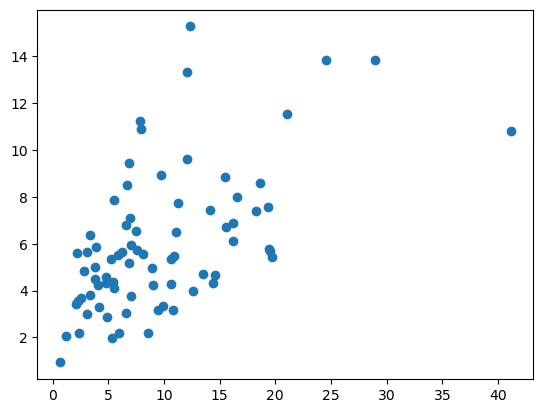

In [24]:
plt.scatter(df_tmp['Patience Time'], df_tmp['Handle Time'])